I want to see if it is possible to put fields closer to the equator (or around 50deg of declination) if we split the observations into four three month periods, which means for every winter/summer there are two different set of fields

In [1]:
#!pip install skyfield
import numpy as np
from skyfield.api import load, Topos
import matplotlib.pyplot as plt

In [2]:
# Load ephemeris data
eph = load('de421.bsp')
earth, moon, sun = eph['earth'], eph['moon'], eph['sun']

ts = load.timescale()

#Calculation of the angular distance in equatorial coordinates
def angular_distance(ra1, dec1, ra2, dec2):
    ra1 = np.deg2rad(ra1 * 15)  # Convert hours to degrees
    ra2 = np.deg2rad(ra2 * 15)  # Convert hours to degrees
    dec1 = np.deg2rad(dec1)
    dec2 = np.deg2rad(dec2)
    cos_distance = np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2)
    distance = np.arccos(cos_distance)
    return np.rad2deg(distance)

from skyfield.framelib import ecliptic_frame

#Calculation of the angular distance in ecliptic coordinates
def angular_distance_ecliptic(lat1, lon1, lat2, lon2):
    lat1 = np.deg2rad(lat1)  
    lat2 = np.deg2rad(lat2)  
    lon1 = np.deg2rad(lon1)
    lon2 = np.deg2rad(lon2)
    cos_distance = np.sin(lon1) * np.sin(lon2) + np.cos(lon1) * np.cos(lon2) * np.cos(lat1 - lat2)
    distance = np.arccos(cos_distance)
    return np.rad2deg(distance)

#Only 3 months starting March 21st and ending June 20th (23 days in total)
d_3 = np.arange(21,32,4)
d_4 = np.arange(2,31,4)
d_5 = np.arange(4,32,4)
d_6 = np.arange(1,21,4)

# Arrays to hold Latitude and Longitude values of moon, earth and sun
sun_lat_values = []
sun_lon_values = []
moon_lat_values = []
moon_lon_values = []
earth_lat_values = []
earth_lon_values = []

# Generate a grid of RA and Dec values
ra_grid = np.linspace(0, 24, 360)  # RA from 0 to 24 hours
dec_grid = np.linspace(-90, 90, 180)  # Dec from -90 to 90 degrees

# Generate a grid of Latitude and Longitude values
lat_grid = np.linspace(-90, 90, 180)  # Latitude from -90 to 90 degrees
lon_grid = np.linspace(0, 360, 180)  # Longitude from 0 to 360 degrees
safe_lat = []
safe_lon = []

In [3]:
from skyfield.api import EarthSatellite

#Ideal Satellite
line1_ideal = '1 00001U 20001A   24094.87500000  .00000000  00000-0  00000-0 0  0000'
line2_ideal = '2 00001   0.0000  0.0000 0000000  0.0000  0.0000  1.00000000  00000' # exactly 1 rev. per day
satellite_ideal = EarthSatellite(line1_ideal, line2_ideal, 'Ideal Satellite', ts)

Now the 3 month constraints in Ecliptic Coordinates, which is still completly wrong but we should maybe also fix that at some point:

In [4]:
#Trajectory of the moon in ecliptic coordinates
for i in np.arange(3,7): # 3 months starting March 21st
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for m in np.arange(0,60,15):
            t = ts.utc(2024, i, d, 21, m)
            astrometric = observer.at(t).observe(moon)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            moon_lat_values.append(lat.degrees)
            moon_lon_values.append(lon.degrees)
        for m in np.arange(0,60,15):
            t = ts.utc(2024, i, d, 22, m)
            astrometric = observer.at(t).observe(moon)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            moon_lat_values.append(lat.degrees)
            moon_lon_values.append(lon.degrees)
        for m in np.arange(0,46,15):
            t = ts.utc(2024, i, d, 23, m)
            astrometric = observer.at(t).observe(moon)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            moon_lat_values.append(lat.degrees)
            moon_lon_values.append(lon.degrees)
            
#Trajectory of the sun in ecliptic coordinates
for i in np.arange(3,7): # only 3 months starting March 21st
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for m in np.arange(0,60,30): # time steps are even further apart for increased calculation speed
            t = ts.utc(2024, i, d, 21, m)
            astrometric = observer.at(t).observe(sun)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            sun_lat_values.append(lat.degrees)
            sun_lon_values.append(lon.degrees)
        for m in np.arange(0,60,15):
            t = ts.utc(2024, i, d, 22, m)
            astrometric = observer.at(t).observe(sun)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            sun_lat_values.append(lat.degrees)
            sun_lon_values.append(lon.degrees)
        for m in np.arange(0,46,15):
            t = ts.utc(2024, i, d, 23, m)
            astrometric = observer.at(t).observe(sun)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            sun_lat_values.append(lat.degrees)
            sun_lon_values.append(lon.degrees)
            
#Trajectory of the earth in ecliptic coordinates
for i in np.arange(3,7): # now just for 3 months
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for m in np.arange(0,60,30): # time steps are even further apart for increased calculation speed
            t = ts.utc(2024, i, d, 21, m)
            astrometric = (earth + satellite_ideal).at(t).observe(earth)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            earth_lat_values.append(lat.degrees)
            earth_lon_values.append(lon.degrees)
        for m in np.arange(0,60,15):
            t = ts.utc(2024, i, d, 22, m)
            astrometric = (earth + satellite_ideal).at(t).observe(earth)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            earth_lat_values.append(lat.degrees)
            earth_lon_values.append(lon.degrees)
        for m in np.arange(0,46,15):
            t = ts.utc(2024, i, d, 23, m)
            astrometric = (earth + satellite_ideal).at(t).observe(earth)
            lat, lon, distance = astrometric.frame_latlon(ecliptic_frame)
            earth_lat_values.append(lat.degrees)
            earth_lon_values.append(lon.degrees)

NameError: name 'observer' is not defined

In [ ]:
#Checking for all 4 constraints
for lat in lat_grid:
    for lon in lon_grid:
        is_safe = True
        for moon_lat, moon_lon in zip(moon_lat_values, moon_lon_values):
            if angular_distance_ecliptic(lat, lon, moon_lat, moon_lon) <= 35:
                is_safe = False
                break
        for sun_lat_1, sun_lon_1 in zip(sun_lat_values, sun_lon_values):
            if angular_distance_ecliptic(lat, lon, sun_lat_1, sun_lon_1) <= 70:
                is_safe = False
                break
        for sun_lat_2, sun_lon_2 in zip(sun_lat_values, sun_lon_values):
            if angular_distance_ecliptic(lat, lon, sun_lat_2, sun_lon_2) >= 130:
                is_safe = False
                break
        for earth_lat, earth_lon in zip(earth_lat_values, earth_lon_values):
            if angular_distance_ecliptic(lat, lon, earth_lat, earth_lon) <= 48:
                is_safe = False
                break
        if is_safe:
            safe_lat.append(lat)
            safe_lon.append(lon)
            
#Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(safe_lat, safe_lon, s=1, label='Safe Positions')
plt.xlabel('Lat (degrees)')
plt.ylabel('Lon (degrees)')
plt.title('Safe Sky Regions')
plt.legend()
plt.show()

#plt.savefig('all_3months_ecliptic',dpi=400)

This version is the current one in equatorial coordinates, meaning that we calculate every 4th day and for every day every 30min. Also the safe position tests includes the points that are observable for 7 consecutive times. And the fields in the end are with distortion:

In [4]:
# The "containers" for all the equatorial coord values for the moon, earth and sun (order: RA, Dec)
moon_eq_values_24 = []
sun_eq_values_24 = []
earth_eq_values_24 = []

# Generate a grid of RA and Dec values
ra_grid = np.linspace(0, 24, 360)  # RA from 0 to 24 hours
dec_grid = np.linspace(-90, 90, 180)  # Dec from -90 to 90 degrees

In [5]:
# Trajectory of the moon every 30 minutes for 6 months every 4th day starting March 21st
for i in np.arange(3,7): # just the "spring months" now
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for h in np.arange(0,24):
            for m in np.arange(0,60,30):
                t = ts.utc(2024, i, d, h, m)
                astrometric = (earth + satellite_ideal).at(t).observe(moon)
                ra, dec, distance = astrometric.radec()
                moon_eq_values_24.append((ra.hours, dec.degrees)) 
        t = ts.utc(2024, i, d, 23, 59)
        astrometric = (earth + satellite_ideal).at(t).observe(moon)
        ra, dec, distance = astrometric.radec()
        moon_eq_values_24.append((ra.hours, dec.degrees))
            
#Trajectory calculation for the sun
for i in np.arange(3,7): # just the "spring months" now
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for h in np.arange(0,24):
            for m in np.arange(0,60,30):
                t = ts.utc(2024, i, d, h, m)
                astrometric = (earth + satellite_ideal).at(t).observe(sun)
                ra, dec, distance = astrometric.radec()
                sun_eq_values_24.append((ra.hours, dec.degrees))
        t = ts.utc(2024, i, d, 23, 59)
        astrometric = (earth + satellite_ideal).at(t).observe(sun)
        ra, dec, distance = astrometric.radec()
        sun_eq_values_24.append((ra.hours, dec.degrees))

#Trajectory for the earth observed from the satellite
for i in np.arange(3,7): # just the "spring months" now
    var = f'd_{i}'
    var_2 = globals()[var]
    for d in var_2:
        for h in np.arange(0,24):
            for m in np.arange(0,60,30):
                t = ts.utc(2024, i, d, h, m)
                astrometric = (earth + satellite_ideal).at(t).observe(earth)
                ra, dec, distance = astrometric.radec()
                earth_eq_values_24.append((ra.hours, dec.degrees))
        t = ts.utc(2024, i, d, 23, 59)
        astrometric = (earth + satellite_ideal).at(t).observe(earth)
        ra, dec, distance = astrometric.radec()
        earth_eq_values_24.append((ra.hours, dec.degrees))

Now we get to the actual safe positions:

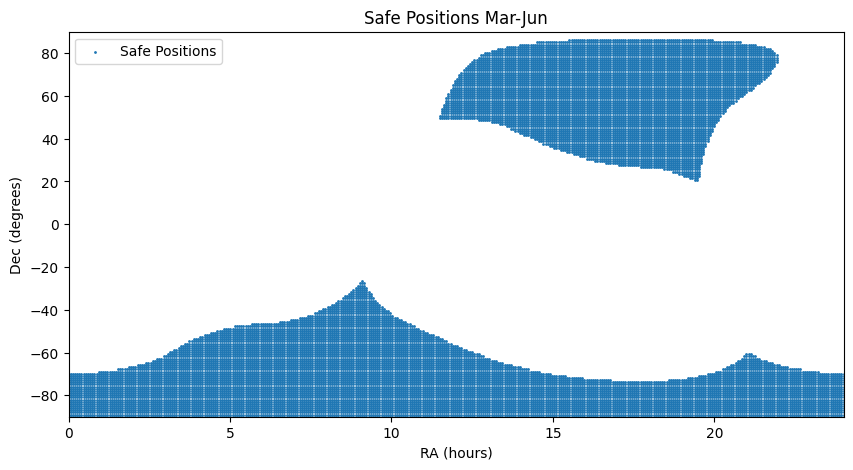

In [6]:
# Splitting the positions into lists of 49 bc for one day positions are calculated 49 times
day_size = 49
moon_daysplit = [moon_eq_values_24[i:i + day_size] for i in range(0, len(moon_eq_values_24), day_size)]
sun_daysplit = [sun_eq_values_24[i:i + day_size] for i in range(0, len(sun_eq_values_24), day_size)]
earth_daysplit = [earth_eq_values_24[i:i + day_size] for i in range(0, len(earth_eq_values_24), day_size)]

# Function to check if there are at least 2 consecutive valid time steps
def has_consecutive_times(times, n=2):
    times = sorted(times)
    for i in range(len(times) - n + 1):
        if times[i + n - 1] - times[i] == n - 1:
            return True
    return False

# Main loop to check for safe RA-Dec combinations
safe_coord_24_new = []

for ra in ra_grid:
    for dec in dec_grid:
        is_safe = True
        
        for d in np.arange(0, 23):  # Loop over days
            t = 0  # time step counter
            safe_t = []  # list for the safe time steps
            
            # Apply moon constraint
            for moon_ra, moon_dec in moon_daysplit[d]:
                if angular_distance(ra, dec, moon_ra, moon_dec) >= 35:
                    safe_t.append(t)
                t += 1
            
            # If there are fewer than 2 valid time steps, break early
            if len(safe_t) < 2:
                is_safe = False
                break
            
            # Apply sun constraint
            sun_day = sun_daysplit[d]
            safe_t_2 = []
            for x in safe_t:
                sun_day_step = sun_day[x]
                sun_distance = angular_distance(ra, dec, sun_day_step[0], sun_day_step[1])
                if 70 <= sun_distance <= 130:  # Sun constraint: between 70 and 130 degrees
                    safe_t_2.append(x)
            
            # If there are fewer than 2 valid time steps after the sun constraint, break early
            if len(safe_t_2) < 2:
                is_safe = False
                break
            
            # Apply earth constraint
            earth_day = earth_daysplit[d]
            safe_t_3 = []
            for y in safe_t_2:
                earth_day_step = earth_day[y]
                if angular_distance(ra, dec, earth_day_step[0], earth_day_step[1]) >= 48:
                    safe_t_3.append(y)
            
            # If there are fewer than 2 valid time steps after the earth constraint, break early
            if len(safe_t_3) < 2:
                is_safe = False
                break
            
            # Check if there are at least 2 consecutive valid time steps
            if not has_consecutive_times(safe_t_3, n=2):
                is_safe = False
                break
        
        # If the ra-dec pair is safe for all days, add it to the list
        if is_safe:
            safe_coord_24_new.append((ra, dec))
            
safe_ra_24_new = [x[0] for x in safe_coord_24_new]
safe_dec_24_new = [y[1] for y in safe_coord_24_new]

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(safe_ra_24_new, safe_dec_24_new, s=1, label='Safe Positions')
plt.xlim(0, 24)
plt.ylim(-90, 90)
plt.xlabel('RA (hours)')
plt.ylabel('Dec (degrees)')
plt.title('Safe Positions Mar-Jun')
plt.legend()
plt.show()

#plt.savefig('all_3m_spring_final', dpi=400)

Now we try to place the fields (or look into which regions are suitable for how many fields), but taking into account the distortion the closer we get to the poles:\
Now we need to implement this into our safe sky positions which will reduce the number of fields that we can observe. The declination span for one field will still always be 14.28°, but the RA, now also in degrees, that is necessary to place one field is $\frac{14.28°}{cos(Dec)}$. This means that the necessary space is bigger for the horizontal side that is closer to one of the poles\
$\cdot$ So we need to alter the test for possible fields at certain declination (ranges) with this adjustment\
$\cdot$ Since the field width at the equator is 14.28° we can easily calculate what the maximum absolute value for the upper/lower boundary of a field by solving $\frac{14.28}{cos(\theta)}=360$ for $\theta$. The result is $\pm$87.73°, which means that the highest/lowest field could be between $\pm$73.45° and $\pm$87.73° ( center at $\pm$80.59°)

In [7]:
safe_ra_deg = [element * 15 for element in safe_ra_24_new]

safe_coord_deg = list(zip(safe_ra_deg, safe_dec_24_new)) # Creating a new list where both RA and Dec are in degrees

Now we just want to place some fields, starting with the position where in an old version with missing distortion, the field F1 was

In [8]:
# Function to plot squares with RA distortion and curved sides
def plot_adjusted_square(ax, ra_center, dec_center, size_deg, num_points, field_num): # Maybe we need to reduce num_points for the field_observeability later (runtime issue)
    """
    Plots a square of a given size (in degrees) centered at (ra_center, dec_center),
    but the RA side is distorted based on the declination, and the square is sampled
    at multiple points to create curved sides.
    
    - num_points controls how many points are sampled along each side of the square.
    """
    # Convert size from degrees to radians
    size_dec = size_deg  # No distortion in Dec size
    
    # Create arrays of declination points for the left and right sides
    dec_sides = np.linspace(dec_center - size_dec / 2, dec_center + size_dec / 2, num_points)

    # RA for the left and right sides (constant in RA, but dec varies)
    ra_left = ra_center - size_deg / 2 / np.cos(np.deg2rad(dec_sides))
    ra_right = ra_center + size_deg / 2 / np.cos(np.deg2rad(dec_sides))

    # Combine vertices (clockwise order)
    ra_vertices = np.concatenate([ra_left[::-1], ra_right])
    dec_vertices = np.concatenate([dec_sides[::-1], dec_sides])

    # Plot the shape using the transformed vertices
    ax.fill(ra_vertices, dec_vertices, color='red', alpha=0.5)
    ax.text(ra_center, dec_center, str(field_num), fontsize=10, ha='center', va='bottom')
    
    return list(zip(ra_vertices, dec_vertices))

__Upper Region__\
Field 1 is placed as far as possible in the lower right corner: (285.2088022284123, 32.88245810055867)\
Field 2 is placed left of F1: (268.2933704735376, 34.1936312849162)\
Field 3 is placed again left of F2: (251.0133704735376, 37.2936312849162)\
Field 4 again placed on the left of F3: (232.9333704735376, 43.4936312849162)\
Field 5 above Field 1 on the right: (287.6088022284123, 45.92245810055867)\
Field 6 is placed as far left as possible in the upper region: (195, 56.6)\
Field 7 is placed above F3 as far right as F5 allows: (266.2133704735376, 50.3336312849162)\
Field 8 above F5 as far right as possible: (292.4088022284123, 58.96245810055867)\
Field 9 above F4 as far left as possible: (232.8333704735376, 56.5336312849162)\
Field 10 above F7: (256.2133704735376, 63.3736312849162)

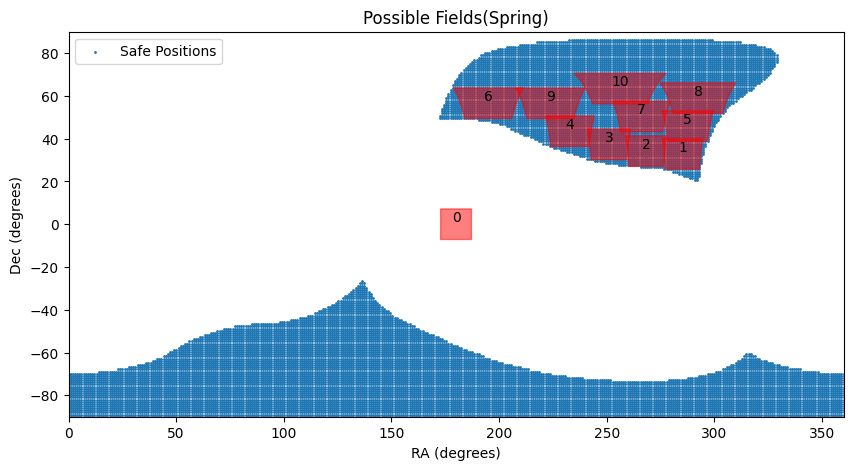

In [9]:
# Set up a plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Safe Positions
ax.scatter(safe_ra_deg, safe_dec_24_new, s=1, label='Safe Positions')

# Test case: plot squares of the same "physical" size at different declinations
square_size_deg = 14.28  # 10-degree square
ra_dec_center = [(180, 0), (285.2088022284123, 32.88245810055867), (268.2933704735376, 34.1936312849162),
                 (251.0133704735376, 37.2936312849162), (232.9333704735376, 43.4936312849162),
                 (287.6088022284123, 45.92245810055867), (195, 56.6),
                 (266.2133704735376, 50.3336312849162), (292.4088022284123, 58.96245810055867),
                 (223.8333704735376, 56.5336312849162), (256.2133704735376, 63.3736312849162)] # Center of the fields in (RA,Dec)-tuples

# List to store the fields (each is a list of tuples)
fields = []

# Plotting and storing the points around each field
for i, (ra_center, dec_center) in enumerate(ra_dec_center):
    # Plot the square and retrieve the vertices
    vertices = plot_adjusted_square(ax, ra_center, dec_center, square_size_deg, 50, i)

    # Store the vertices in the list with dynamic names (field_1, field_2, etc.)
    fields.append(vertices)

    
#ax.plot(304.61234534899125, 52.405315243415814, 'go') # I use this point to show were an overlap occurs
# Customize plot labels and title
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)
ax.set_xlabel("RA (degrees)")
ax.set_ylabel("Dec (degrees)")
ax.set_title("Possible Fields(Spring)")
ax.legend()
#plt.grid(True)
plt.show()

Below we have a test whether the sensitive areas of two fields overlap. For this purpose we always look how far the (sensitive areas of the) fields extend towards each other at the maximum declination (of the sensitive area) of the field that is further from the poles:

In [10]:
# A test whether Field 9 and 10 overlap with their sensitive areas
field9_up_sen = ra_dec_center[9][1]+7.14-0.62 # The upper edge of the sensitive area of Field 6
field9_right_sen = ra_dec_center[9][0]+(6.52/np.cos(np.deg2rad(field9_up_sen))) # RA of the upper right corner of the sensitive area of F5
field10_left_sen = ra_dec_center[10][0]-(6.52/np.cos(np.deg2rad(field9_up_sen))) # RA of the left most point of F5 at the Dec of F5 upper sensitive area edge
print("The sensitive area of Field9 ends at",field9_right_sen,"° and the sensitive area of Field10 at the same height begins at",field10_left_sen)

The sensitive area of Field9 ends at 238.22134273262765 ° and the sensitive area of Field10 at the same height begins at 241.82539821444757


Now we need a field_observeability function to easily test whether a field is observable or not.\
For every declination value that is within the height of the field we need to create a list with the RA values that are within the field at the specific declination values. So we need to run a loop over the declination values that then selects the RA values within the field and tests the combinations:\
Since for every declination we have the right- and leftmost RA value we can just select the eligible ra_grid between these two. Since the first 50 tuples of a field are for the left side and the last 50 are from the right side, we can take the ra_grid values between the first element of the first tuple and the first element of the last tuple, between the second and the second last and so on.

In [11]:
# Creating the new moon/sun/earth_dayplits, which contain both RA and Dec values in degrees

# First we just define the old daysplits again
day_size = 49
moon_daysplit = [moon_eq_values_24[i:i + day_size] for i in range(0, len(moon_eq_values_24), day_size)]
sun_daysplit = [sun_eq_values_24[i:i + day_size] for i in range(0, len(sun_eq_values_24), day_size)]
earth_daysplit = [earth_eq_values_24[i:i + day_size] for i in range(0, len(earth_eq_values_24), day_size)]

# Loop through each day in the daysplits
for day in moon_daysplit:
    # Loop through each tuple in a day
    for i in range(len(day)):
        # Multiply the first element of the tuple by 15 and update the tuple
        day[i] = (day[i][0] * 15, day[i][1])
for day in sun_daysplit:
    # Loop through each tuple in a day
    for i in range(len(day)):
        # Multiply the first element of the tuple by 15 and update the tuple
        day[i] = (day[i][0] * 15, day[i][1])
for day in earth_daysplit:
    # Loop through each tuple in a day
    for i in range(len(day)):
        # Multiply the first element of the tuple by 15 and update the tuple
        day[i] = (day[i][0] * 15, day[i][1])

In [12]:
# We need a new function for the angular distance because we now use degrees for both the Declination and the RA

#Calculation of the angular distance in equatorial coordinates
def angular_distance_deg(ra1, dec1, ra2, dec2):
    ra1 = np.deg2rad(ra1)
    ra2 = np.deg2rad(ra2)
    dec1 = np.deg2rad(dec1)
    dec2 = np.deg2rad(dec2)
    cos_distance = np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2)
    distance = np.arccos(cos_distance)
    return np.rad2deg(distance)

# We also need to modify the ra_grid to degrees instead of hours (and also the moon_ra, sun_ra and earth_ra values)
ra_grid_deg = np.linspace(0, 360, 360)  # RA from 0 to 360 degrees


def field_observability(field_sides): # we just need to include the RA and Dec positions that would be within the Square
    ra_sides, dec_sides = zip(*field_sides)
    daily_safe_times = [] # A list that will contain the safe time slots for every day
    for d in np.arange(0,23):
        safe_t = None  # Reset safe time steps for each day
        for i, dec in enumerate(dec_sides[:50]): # We only need the first 50 Dec values because the second 50 are the same
            field_ra = []
            field_ra.append(ra_sides[i]) # Including the left RA end point
            j = -(i+1)
            for ra_pre in ra_grid_deg:
                if ra_sides[i] <= ra_pre <= ra_sides[j]:
                    field_ra.append(ra_pre)
            field_ra.append(ra_sides[j]) # Including the right RA end point
            for ra in field_ra:
                t = 0  # time step counter
                safe_t_candidate = []  # list for the safe time steps

                # Apply moon constraint
                for moon_ra, moon_dec in moon_daysplit[d]:
                    if angular_distance_deg(ra, dec, moon_ra, moon_dec) >= 35:
                        safe_t_candidate.append(t)
                    t += 1

                # If there are fewer than 2 valid time steps, we can skip this coordinate
                if len(safe_t_candidate) < 2:
                    return False, ra, dec  # This field is not observable for this day

                # Apply sun constraint
                sun_day = sun_daysplit[d]
                safe_t_2 = []
                for x in safe_t_candidate:
                    sun_day_step = sun_day[x]
                    sun_distance = angular_distance_deg(ra, dec, sun_day_step[0], sun_day_step[1])
                    if 70 <= sun_distance <= 130:
                        safe_t_2.append(x)

                # If there are fewer than 2 valid time steps after sun constraint, skip this coordinate
                if len(safe_t_2) < 2:
                    return False, ra, dec

                # Apply earth constraint
                earth_day = earth_daysplit[d]
                safe_t_3 = []
                for y in safe_t_2:
                    earth_day_step = earth_day[y]
                    if angular_distance_deg(ra, dec, earth_day_step[0], earth_day_step[1]) >= 48:
                        safe_t_3.append(y)

                # If there are fewer than 2 valid time steps after earth constraint or no consecutive steps, skip
                if len(safe_t_3) < 2 or not has_consecutive_times(safe_t_3, n=2):
                    return False, ra, dec  # If no valid set of 2 consecutive time steps, return False

                # If it's the first coordinate, set the safe time steps for this day
                if safe_t is None:
                    safe_t = safe_t_3
                else:
                    # Check if the current RA/Dec combination can be observed for the same time steps as safe_t and naming it safe_t again since 
                    # otherwise we only compare the safe time slots from the first coordinate to all the others
                    safe_t = list(set(safe_t).intersection(safe_t_3))
                    if len(safe_t) < 2 or not has_consecutive_times(safe_t, n=2):
                        return False, ra, dec  # This field can't be observed for the same 2 consecutive time steps
        daily_safe_times.append(safe_t)
                    
    return daily_safe_times

Now we need to compare the time slots for every single day, i guess we can do that with the "has_consecutive_times" function. Remember that we only need 15min of observation time for one field and have a maximum slew time of 1.5min between two fields. So for example, it's possible to observe 3 fields within 2 time slots, since the observation including slew time takes up to 45min+3min. We also need to keep in mind that the fields need to be within 40 degs of angular distance, so we can't have some restrictions to the order in which we must observe the fields. (Maybe we can visualize this first off by drawing 40deg circles around the centers of the fields.)

In [13]:
# Testing the fields if they are safe in general and which time slots are available every day
field1_observable = field_observability(fields[1])
field1_observable

[[29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  15,
  1

In [14]:
field2_observable = field_observability(fields[2])
field2_observable

[[13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,


In [15]:
field3_observable = field_observability(fields[3])
field3_observable

[[10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,


In [16]:
field4_observable = field_observability(fields[4])
field4_observable

[[7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  2

In [17]:
field5_observable = field_observability(fields[5])
field5_observable

[[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
 [0,
  1,
  2,
  3,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  14,
  1

In [18]:
field6_observable = field_observability(fields[6])
field6_observable

[[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14

In [19]:
field7_observable = field_observability(fields[7])
field7_observable

[[0,
  1,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  10,
  11

In [20]:
field8_observable = field_observability(fields[8])
field8_observable

[[28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3

In [21]:
field9_observable = field_observability(fields[9])
field9_observable

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,

In [22]:
field10_observable = field_observability(fields[10])
field10_observable

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,

Let's see if it's possible to establish some order in which we could observe the fields. First try: Just taking the time slots that are included in all fields for one specific day, which would allow us to observe in any order (only that the fields are not all within 40 degrees of each other)

In [23]:
def nth_day_common_timeslots(n):
    nth_day = [] # A list that contains the lists of every available time slot for each field on the nth-day
    for i in np.arange(1,11):
        var = f'field{i}_observable'
        var2 = globals()[var]
        nth_day.append(var2[n])
    common_elements = set(nth_day[0])  # Start with the first list
    for lst in nth_day[1:]:  # Iterate through the remaining lists
        common_elements.intersection_update(lst)
    nth_day_common_timeslots = list(common_elements)
    return nth_day_common_timeslots

Now let's see which time slots are available for every field on each day, we'd need 7 consecutive each day for an easy solution or six and one field that is not in the middle, that can be observed one time step later or earlier than the common one.

In [24]:
for n in np.arange(0,23):
    print(nth_day_common_timeslots(n))

[38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24

Only on the first day doesnt provide seven time steps, but it's possible to observe, for example, Field 10 at step 37, so the problem is eliminated\
THE FUNCTION BELOW IS USEFUL WHEN WE STILL HAVE TO MOVE THE FIELDS AROUND TO FIND AVAILABLE TIME SLOTS FOR EVERY DAY

In [25]:
def nth_day_common_timeslots_2(n):
    nth_day = [] # A list that contains the lists of every available time slot for each field on the nth-day
    for i in np.array([1,2,3,4,5,7,8,10]): # so we're not taking every field
        var = f'field{i}_observable'
        var2 = globals()[var]
        nth_day.append(var2[n])
    common_elements = set(nth_day[0])  # Start with the first list
    for lst in nth_day[1:]:  # Iterate through the remaining lists
        common_elements.intersection_update(lst)
    nth_day_common_timeslots_2 = list(common_elements)
    return nth_day_common_timeslots_2

Testing the SFD98 extinction map:

In [28]:
!pip install healpy

Defaulting to user installation because normal site-packages is not writeable


<Figure size 1000x500 with 0 Axes>

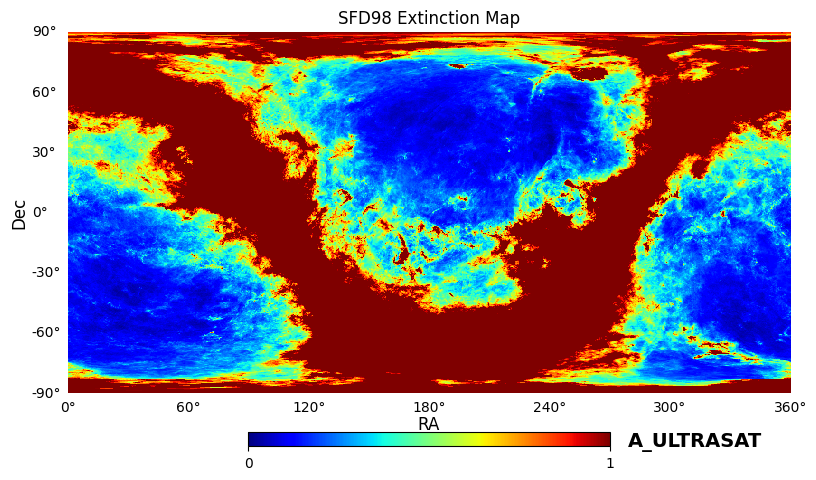

In [26]:
import healpy as hp
import matplotlib.pyplot as plt

# Replace this with the path to your lambda_sfd_ebv.fits file, source: https://lambda.gsfc.nasa.gov/product/foreground/fg_sfd_get.html
sfd_file = 'lambda_sfd_ebv.fits'

# Load the HEALPix data
ebv_map = hp.read_map(sfd_file, hdu=1)

# Create a figure with specific aspect ratio (width=2xheight)
fig = plt.figure(figsize=(10, 5))

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map", cmap='jet', unit='A_ULTRASAT', min=0, max=1, notext=True)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

Before we can include the proposed fields we need to alter the plot_adjusted_square function a little bit, so that it actually works here:

In [39]:
# Function to plot squares with RA distortion and curved sides
def plot_adjusted_square2(ra_center, dec_center, size_deg, num_points, field_num):
    """
    Plots a square of a given size (in degrees) centered at (ra_center, dec_center),
    but the RA side is distorted based on the declination, and the square is sampled
    at multiple points to create curved sides.
    
    num_points controls how many points are sampled along each side of the square.
    """
    # Convert size from degrees to radians
    size_dec = size_deg  # No distortion in Dec size

    ra_center = ra_center - 180 # shifting the ra_center so they fit with the new coordinates
    ra_center = -ra_center # Inverting at the y-axis
    dec_center = -dec_center # Inverting at the x-axis
    
    # Create arrays of declination points for the left and right sides
    dec_sides = np.linspace(dec_center - size_dec / 2, dec_center + size_dec / 2, num_points)

    # RA for the left and right sides (constant in RA, but dec varies)
    ra_left = ra_center - size_deg / 2 / np.cos(np.deg2rad(dec_sides))
    ra_right = ra_center + size_deg / 2 / np.cos(np.deg2rad(dec_sides))

    # Combine vertices (clockwise order)
    ra_vertices = np.concatenate([ra_left[::-1], ra_right])
    dec_vertices = np.concatenate([dec_sides[::-1], dec_sides])

    # Plot the shape using the transformed vertices
    plt.fill(ra_vertices, dec_vertices, color='red', alpha=0.5)
    plt.text(ra_center, dec_center, str(field_num), fontsize=10, ha='center', va='bottom')
    # Note that we only use the right and left side of the square, we dont really need the top and bottom because
    # we dont have any regions with narrow vertical peaks, so we can just test whether the sides fulfill field_observeability

    return list(zip(ra_vertices, dec_vertices))

Now we include the safe sky positions and the proposed fields in the same image we have for the SFD98 map:

<Figure size 1000x500 with 0 Axes>

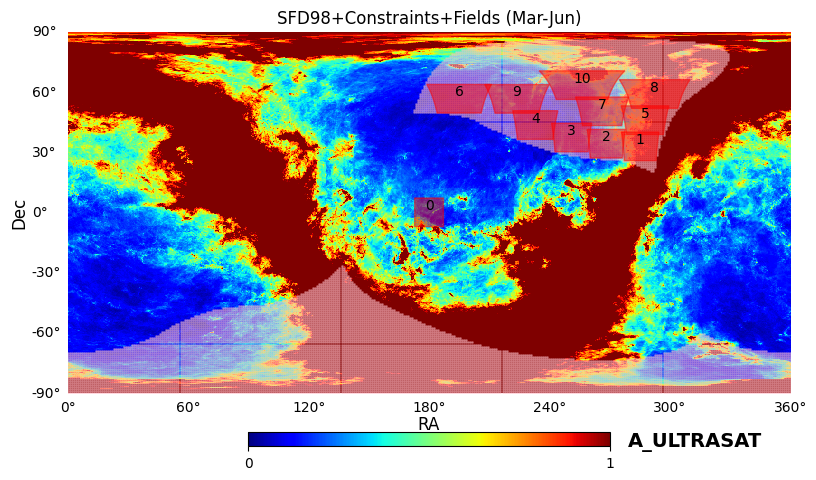

In [40]:
# Convert RA/Dec (theta, phi) to Healpy pixel indices
safe_dec_nparray = np.array(safe_dec_24_new) # Converting the Dec points into np.array, because only then the next line doesnt produce an error
safe_dec_nparray = -safe_dec_nparray # Inverting at the x axis, to match the new coordinate system
safe_ra_nparray = np.array(safe_ra_deg) # Converting the RA points into an np.array
ra_data_wrapped = safe_ra_nparray -180 # Switching to a system where RA ranges from -180° to 180°
ra_data_wrapped = -ra_data_wrapped # Inverting at the y axis because we also need to flip the other data later on

# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98+Constraints+Fields (Mar-Jun)", cmap='jet', unit='A_ULTRASAT', min=0, max=1, notext=True)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.4, s=1, marker='o')

for i, (ra_center, dec_center) in enumerate(ra_dec_center):
   plot_adjusted_square2(ra_center, dec_center, square_size_deg, 50, i)


# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Show the plot
#plt.legend() # this does not work right now
plt.show()

Let's try to move the fields around some more, keeping them out of the high reddening zones as good as possible while still staying as far away from the north pole as possible. Fields that were moved so far are Field 7 to the left, Field 5 to the left and a little bit up, same for Field 8 and Field 10 as far left as possible.

In [62]:
ra_dec_center_2 = [(180, 0), (285.2088022284123, 32.88245810055867), (268.2933704735376, 34.1936312849162),
                   (251.0133704735376, 37.2936312849162), (232.9333704735376, 43.4936312849162),
                   (275.4088022284123, 47.2336312849162), (195, 56.6),
                   (253.3133704735376, 50.3336312849162), (285.7088022284123, 60.2736312849162),
                   (223.8333704735376, 56.5336312849162), (252.6133704735376, 63.3736312849162)] # Center of the fields in (RA,Dec)-tuples

<Figure size 1000x500 with 0 Axes>

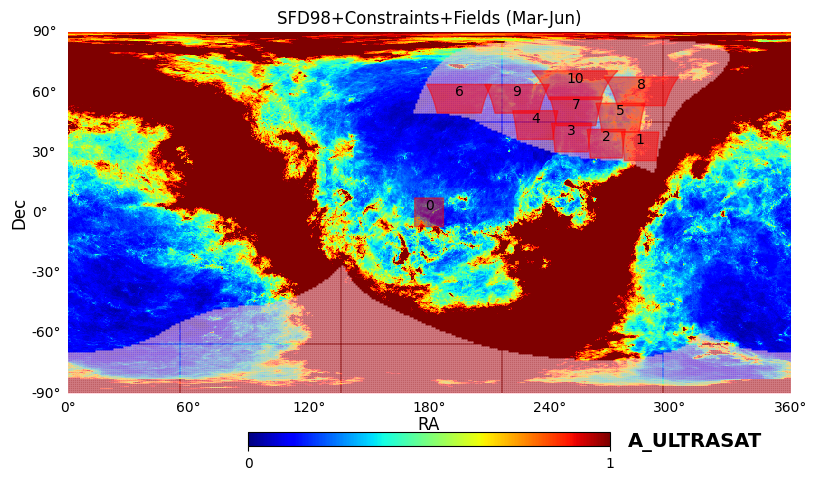

In [63]:
# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98+Constraints+Fields (Mar-Jun)", cmap='jet', unit='A_ULTRASAT', min=0, max=1, notext=True)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.4, s=1, marker='o')

# List to store the fields (each is a list of tuples)
fields_2 = []

for i, (ra_center, dec_center) in enumerate(ra_dec_center_2):
    # Plot the square and retrieve the vertices
    vertices_2 = plot_adjusted_square2(ra_center, dec_center, square_size_deg, 50, i)

    # Store the vertices in the list with dynamic names (field_1, field_2, etc.)
    fields_2.append(vertices_2)

# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Show the plot
#plt.legend() # this does not work right now
plt.show()

In [64]:
# A test whether Field x and y overlap with their sensitive areas
field8_up_sen = ra_dec_center_2[8][1]+7.14-0.62 # The upper edge of the sensitive area of the field closer to the equator
field10_right_sen = ra_dec_center_2[10][0]+(6.52/np.cos(np.deg2rad(field8_up_sen))) # RA of the upper right corner of the sensitive area of the left field
field8_left_sen = ra_dec_center_2[8][0]-(6.52/np.cos(np.deg2rad(field8_up_sen))) # RA of the left most point of F5 at the Dec of F5 upper sensitive area edge
print("The sensitive area of Field10 ends at",field10_right_sen,"° and the sensitive area of Field8 at the same height begins at",field8_left_sen)

The sensitive area of Field10 ends at 269.1597429109069 ° and the sensitive area of Field8 at the same height begins at 269.162429791043


In [54]:
# Testing the observability of Field 5 at it's new position
ra_sides_5, dec_sides_5 = zip(*fields_2[5])
ra_sides_5_np = np.array(ra_sides_5) # transforming to np.array bc otherwise the inversion wont work
dec_sides_5_np = np.array(dec_sides_5) # transforming to np.array bc otherwise the inversion wont work

dec_sides_5_np = -dec_sides_5_np # Undoing the x-axis inversion
ra_sides_5_np = -ra_sides_5_np # Undoing the y-axis inversion
ra_sides_5_np = ra_sides_5_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_5_adjust = list(zip(ra_sides_5_np, dec_sides_5_np)) # rezipping the field sides

field5_observable_2 = field_observability(field_5_adjust)
field5_observable_2

[[0,
  1,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21

In [53]:
# Testing the observability of Field 7 at it's new position
ra_sides_7, dec_sides_7 = zip(*fields_2[7])
ra_sides_7_np = np.array(ra_sides_7) # transforming to np.array bc otherwise the inversion wont work
dec_sides_7_np = np.array(dec_sides_7) # transforming to np.array bc otherwise the inversion wont work

dec_sides_7_np = -dec_sides_7_np # Undoing the x-axis inversion
ra_sides_7_np = -ra_sides_7_np # Undoing the y-axis inversion
ra_sides_7_np = ra_sides_7_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_7_adjust = list(zip(ra_sides_7_np, dec_sides_7_np)) # rezipping the field sides

field7_observable_2 = field_observability(field_7_adjust)
field7_observable_2

[[9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,

In [68]:
# Testing the observability of Field 8 at it's new position
ra_sides_8, dec_sides_8 = zip(*fields_2[8])
ra_sides_8_np = np.array(ra_sides_8) # transforming to np.array bc otherwise the inversion wont work
dec_sides_8_np = np.array(dec_sides_8) # transforming to np.array bc otherwise the inversion wont work

dec_sides_8_np = -dec_sides_8_np # Undoing the x-axis inversion
ra_sides_8_np = -ra_sides_8_np # Undoing the y-axis inversion
ra_sides_8_np = ra_sides_8_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_8_adjust = list(zip(ra_sides_8_np, dec_sides_8_np)) # rezipping the field sides

field8_observable_2 = field_observability(field_8_adjust)
field8_observable_2

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,

In [69]:
# Testing the observability of Field 10 at it's new position
ra_sides_10, dec_sides_10 = zip(*fields_2[10])
ra_sides_10_np = np.array(ra_sides_10) # transforming to np.array bc otherwise the inversion wont work
dec_sides_10_np = np.array(dec_sides_10) # transforming to np.array bc otherwise the inversion wont work

dec_sides_10_np = -dec_sides_10_np # Undoing the x-axis inversion
ra_sides_10_np = -ra_sides_10_np # Undoing the y-axis inversion
ra_sides_10_np = ra_sides_10_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_10_adjust = list(zip(ra_sides_10_np, dec_sides_10_np)) # rezipping the field sides

field10_observable_2 = field_observability(field_10_adjust)
field10_observable_2

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,

Now we just need to look for an observation order again, using the nth_day_common_timeslots function in a slightly altered version with our new fields, since Field 5,7,8,10 got moved we need to enter those manually:

In [72]:
# new nth_day_common_timeslots function
def nth_day_common_timeslots_2(n):
    nth_day = [] # A list that contains the lists of every available time slot for each field on the nth-day
    for i in np.array([1,2,3,4,6,9]):
        var = f'field{i}_observable'
        var2 = globals()[var]
        nth_day.append(var2[n])
    for j in np.array([5,7,8,10]):
        var = f'field{j}_observable_2'
        var2 = globals()[var]
        nth_day.append(var2[n])
    common_elements = set(nth_day[0])  # Start with the first list
    for lst in nth_day[1:]:  # Iterate through the remaining lists
        common_elements.intersection_update(lst)
    nth_day_common_timeslots = list(common_elements)
    return nth_day_common_timeslots

In [73]:
for n in np.arange(0,23):
    print(nth_day_common_timeslots_2(n))

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[15, 16, 17, 18, 19

With the new arrangment of fields we actually got more freedom in choosing the timeslots as every day has at least 11 consecutive time slots that allow an observation.

And finally I also need one version where it's only the proposed fields and the Dust map, but not the safe sky regions:

<Figure size 1000x500 with 0 Axes>

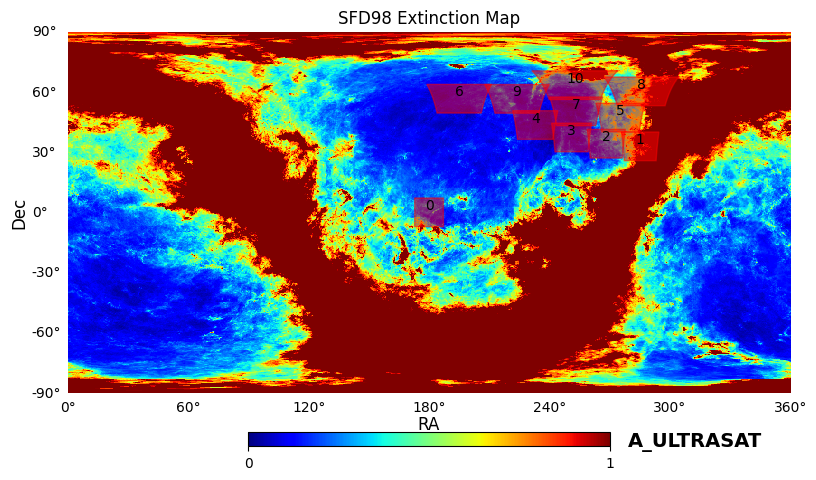

In [66]:
# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the masked Healpy map in equatorial coordinates
#hp.cartview(masked_ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map with RA/Dec Points", 
#            cmap='jet', unit='E(B-V)', min=0, max=1)

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map", cmap='jet', unit='A_ULTRASAT', min=0, max=1, notext=True)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
#plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.3, s=1, marker='o', label='RA/Dec Data Points')

for i, (ra_center, dec_center) in enumerate(ra_dec_center_2):
   plot_adjusted_square2(ra_center, dec_center, square_size_deg, 50, i)


# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Show the plot
#plt.legend() # showing this does not work right now
plt.show()

Now we want to look into the __bigger region__ at the bottom and see how many fields we can place there without getting to close to the south pole, but also not going entirely into the red zones, and it turns out that we can't place more than four fields when we want to keep them above -75° in Declination.

In [191]:
# new ra_dec_center for the lower region
ra_dec_center_low = [(180, 0), (115, -51.5), (90.3, -54.5),
                     (63.38, -65.3), (105.2, -67.54)] # Center of the fields in (RA,Dec)-tuples

<Figure size 1000x500 with 0 Axes>

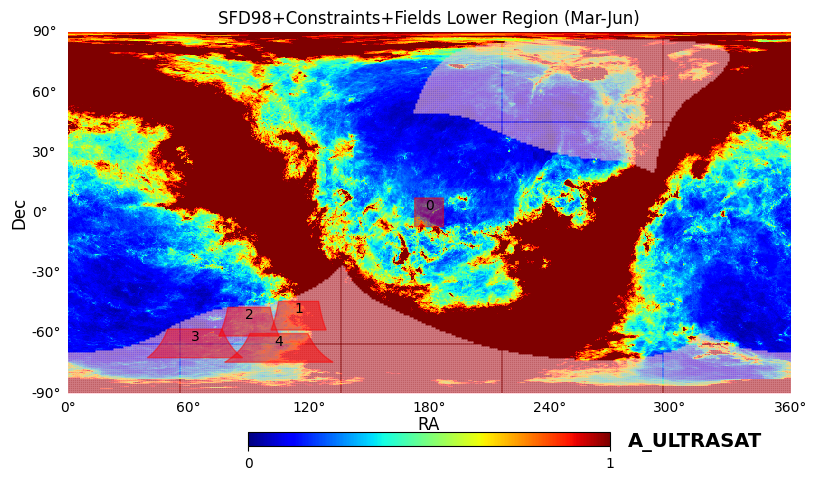

In [192]:
# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98+Constraints+Fields Lower Region (Mar-Jun)", cmap='jet', unit='A_ULTRASAT', min=0, max=1, notext=True)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.4, s=1, marker='o')

# List to store the fields (each is a list of tuples)
fields_low = []

for i, (ra_center, dec_center) in enumerate(ra_dec_center_low):
    # Plot the square and retrieve the vertices
    vertices_low = plot_adjusted_square2(ra_center, dec_center, square_size_deg, 50, i)

    # Store the vertices in the list with dynamic names (field_1, field_2, etc.)
    fields_low.append(vertices_low)

# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Show the plot
#plt.legend() # this does not work right now
plt.show()

In [183]:
# A test whether Field x and y overlap with their sensitive areas
field3_low_sen = ra_dec_center_low[3][1]-7.14+0.62 # The lower edge of the sensitive area of Field x (generally of the one closer to the equator)
field4_left_sen = ra_dec_center_low[4][0]-(6.52/np.cos(np.deg2rad(field3_low_sen))) # leftmost RA of the right field at the lower edge of the higher one
field3_right_sen = ra_dec_center_low[3][0]+(6.52/np.cos(np.deg2rad(field3_low_sen))) # rightmost RA of the left field at the lower sensitive area edge of the higher one
print("The sensitive area of Field 4 begins at",field4_left_sen,"° and the sensitive area of Field 3 at the same height ends at",field3_right_sen)

The sensitive area of Field 4 begins at 84.30278490899646 ° and the sensitive area of Field 3 at the same height ends at 84.27721509100354


Of course we also need to ensure that the picked fields are actually observable:

In [107]:
# Testing the observability of Field 1 in the lower region
ra_sides_low_1, dec_sides_low_1 = zip(*fields_low[1])
ra_sides_low_1_np = np.array(ra_sides_low_1) # transforming to np.array bc otherwise the inversion wont work
dec_sides_low_1_np = np.array(dec_sides_low_1) # transforming to np.array bc otherwise the inversion wont work

dec_sides_low_1_np = -dec_sides_low_1_np # Undoing the x-axis inversion
ra_sides_low_1_np = -ra_sides_low_1_np # Undoing the y-axis inversion
ra_sides_low_1_np = ra_sides_low_1_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_low_1 = list(zip(ra_sides_low_1_np, dec_sides_low_1_np)) # rezipping the field sides

field1_observable_low = field_observability(field_low_1)
field1_observable_low

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  

In [140]:
# Testing the observability of Field 2 in the lower region
ra_sides_low_2, dec_sides_low_2 = zip(*fields_low[2])
ra_sides_low_2_np = np.array(ra_sides_low_2) # transforming to np.array bc otherwise the inversion wont work
dec_sides_low_2_np = np.array(dec_sides_low_2) # transforming to np.array bc otherwise the inversion wont work

dec_sides_low_2_np = -dec_sides_low_2_np # Undoing the x-axis inversion
ra_sides_low_2_np = -ra_sides_low_2_np # Undoing the y-axis inversion
ra_sides_low_2_np = ra_sides_low_2_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_low_2 = list(zip(ra_sides_low_2_np, dec_sides_low_2_np)) # rezipping the field sides

field2_observable_low = field_observability(field_low_2)
field2_observable_low

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  30,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  30,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  30,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  30,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,

In [176]:
# Testing the observability of Field 3 in the lower region
ra_sides_low_3, dec_sides_low_3 = zip(*fields_low[3])
ra_sides_low_3_np = np.array(ra_sides_low_3) # transforming to np.array bc otherwise the inversion wont work
dec_sides_low_3_np = np.array(dec_sides_low_3) # transforming to np.array bc otherwise the inversion wont work

dec_sides_low_3_np = -dec_sides_low_3_np # Undoing the x-axis inversion
ra_sides_low_3_np = -ra_sides_low_3_np # Undoing the y-axis inversion
ra_sides_low_3_np = ra_sides_low_3_np + 180 # moving the coordinates back, so the field_observability function does the right calculations
field_low_3 = list(zip(ra_sides_low_3_np, dec_sides_low_3_np)) # rezipping the field sides

field3_observable_low = field_observability(field_low_3)
field3_observable_low

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,

__EVERYTHING BELOW WAS JUST WORK IN PROGRESS, IM NOT SURE WHETHER THERE IS ANYTHING USEFUL BELOW THIS POINT__

This looks decent for now (although we may need to shift to a more recent version of the reddening map later)\
Let's try to cut out the portions that do not offer a safe observation spot starting with the March-June version: \
IM NOT REALLY SURE RIGHT NOW WHETHER THE INVERSION OF THE AXES IS CORRECT LIKE THAT, SINCE RIGHT NOW WE'VE INVERTED BOTH THE EBV_MAP AS WELL AS THE SAFE_SKY_REGIONS, WHICH KINDA DOES THE SAME AS INVERTING NOTHING RIGHT? In the paper corresponding to this map (https://arxiv.org/pdf/astro-ph/9710327) it says that something is near the Galactic South Pole at b < -62°, so I assume the south pole is at -90°, but this would mean we dont need to invert the ebv_map

/tmp/ipykernel_1396/1237940075.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x500 with 0 Axes>

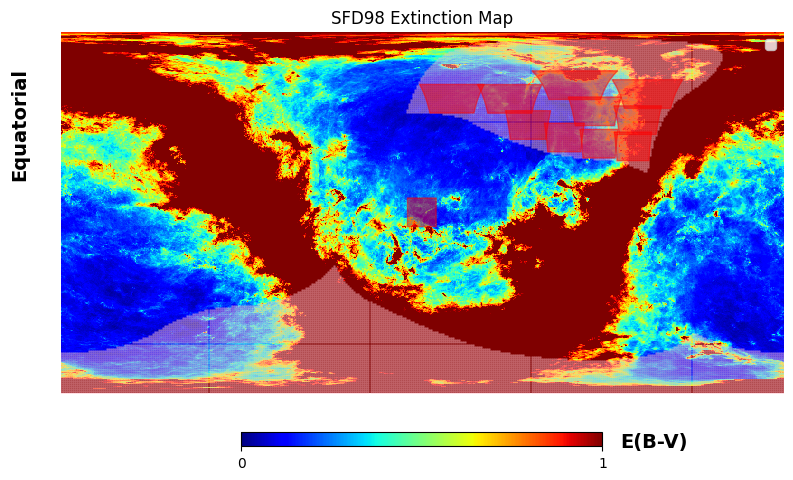

In [33]:
# Convert RA/Dec (theta, phi) to Healpy pixel indices
nside = hp.get_nside(ebv_map) # determines the number of pixels in the healp map, for some reason changing this changes the weird blue spots on the right and left side
safe_dec_nparray = np.array(safe_dec_24_new) # Converting the Dec points into np.array
safe_dec_nparray = -safe_dec_nparray # Inverting at the x axis, to match the new coordinate system
safe_ra_nparray = np.array(safe_ra_deg) # Converting the RA points into an np.array
ra_data_wrapped = safe_ra_nparray -180 # Switching to a system where RA ranges from -180° to 180°
ra_data_wrapped = -ra_data_wrapped # Inverting at the y axis because we also need to flip the other data later on
theta = np.radians(90 - safe_dec_nparray)  # Dec to theta (colatitude)
phi = np.radians(ra_data_wrapped)  # RA to phi (longitude)
pix_indices = hp.ang2pix(nside, theta, phi)  # Healpy expects theta, phi

# Create a mask that retains only the pixels that correspond to your RA/Dec points
#mask = np.zeros_like(ebv_map, dtype=bool)
#mask[pix_indices] = True  # Keep only the relevant pixels

# Apply the mask to the map
#masked_ebv_map = np.ma.masked_where(~mask, ebv_map)

# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the masked Healpy map in equatorial coordinates
#hp.cartview(masked_ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map with RA/Dec Points", 
#            cmap='jet', unit='E(B-V)', min=0, max=1)

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map", cmap='jet', unit='E(B-V)', min=0, max=1)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.3, s=1, marker='o')

for i, (ra_center, dec_center) in enumerate(ra_dec_center):
   plot_adjusted_square2(ra_center, dec_center, square_size_deg)


# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Show the plot
plt.legend()
plt.show()

Moving F7 further to the left, should allow us to move F5 a little bit up and to the left as well, leaving the high reddening zone.

/tmp/ipykernel_1396/148571131.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x500 with 0 Axes>

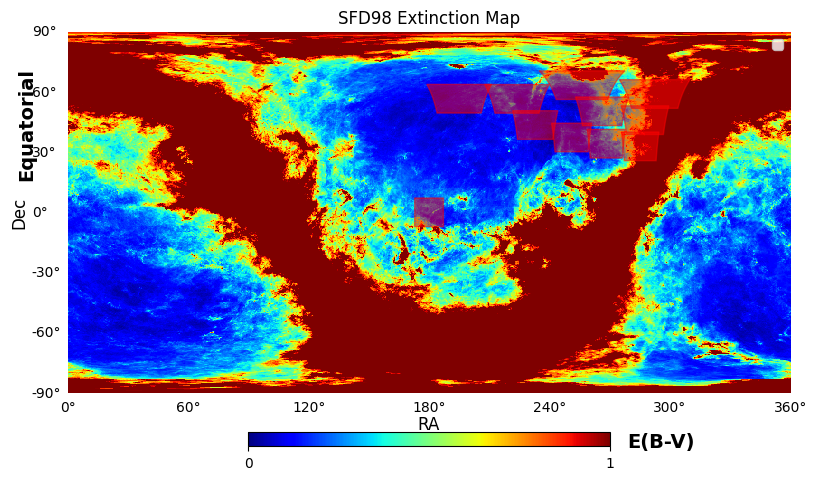

In [34]:
# Plot the overlapped map using `cartview` in Equatorial coordinates
fig = plt.figure(figsize=(10, 5))

# Plot the masked Healpy map in equatorial coordinates
#hp.cartview(masked_ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map with RA/Dec Points", 
#            cmap='jet', unit='E(B-V)', min=0, max=1)

# Plot the SFD98 extinction map
hp.cartview(6.7*ebv_map, coord=['G', 'C'], title="SFD98 Extinction Map", cmap='jet', unit='E(B-V)', min=0, max=1)

# Flip the plot upside down because for some reason the data is upside down
plt.gca().invert_yaxis()

# I think plot also needs to be flipped along the x-axis
plt.gca().invert_xaxis()

# Overlay your RA/Dec points directly on the map
#plt.scatter(ra_data_wrapped, safe_dec_nparray, color='pink', alpha=0.3, s=1, marker='o', label='RA/Dec Data Points')

for i, (ra_center, dec_center) in enumerate(ra_dec_center):
   plot_adjusted_square2(ra_center, dec_center, square_size_deg)


# Add manual labels for Right Ascension (x-axis)
plt.text(0.5, -0.1, 'RA', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Add manual labels for Declination (y-axis)
plt.text(-0.08, 0.5, 'Dec', va='center', rotation='vertical', fontsize=12, transform=plt.gca().transAxes)

# Add RA ticks manually
for ra, label in zip([0, 60, 120, 180, 240, 300, 360], ['0°', '60°', '120°', '180°', '240°', '300°', '360°']):
    plt.text(ra/360, -0.05, label, ha='center', transform=plt.gca().transAxes)

# Add Dec ticks manually
for dec, label in zip([-90, -60, -30, 0, 30, 60, 90], ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°']):
    plt.text(-0.05, (dec+90)/180, label, va='center', transform=plt.gca().transAxes)

# Add labels for RA/Dec if needed
plt.xlabel('Right Ascension [degrees]', fontsize=12)
plt.ylabel('Declination [degrees]', fontsize=12)

# Show the plot
plt.legend()
plt.show()

Another option for a more recent dust map from Finkbeiner and Meisner is available over the following link: https://lambda.gsfc.nasa.gov/product/foreground/fg_meisner_finkbeiner_2015_get.html

Now I need to test how many fields can actually be placed in the upper and lower region. In the end it is desirable that the fields are as far away from the poles as possible, but I also need to look into the dust/extinction map restrictions.\
Anyway first off we start with the strip at the bottom:

In [35]:
from collections import defaultdict

lower_boundary = []

for a,b in safe_coord_24_new:
    if b < 0:              #getting rid of the upper region
        lower_boundary.append((a,b))
    
lower_band = defaultdict(list)

# group tupels by the first element (RA value)
for tup in lower_boundary:
    lower_band[tup[0]].append(tup)
    
# seperate values in different lists
list_lowband = list(lower_band.values())

#List for all the max dec values for each RA value
max_dec_lowband = []

#Search for all the max dec values for each RA value

for group in list_lowband:
    max_dec_individual = max(group, key=lambda x: x[1])
    max_dec_lowband.append(max_dec_individual)
    
# Now we can actually get the lowest Dec value of the upper boundary of the "lower" safe regions 
min_dec_lower_boundary = min(max_dec_lowband, key=lambda x: x[1])

min_dec_lower_boundary

(np.float64(16.846796657381617), np.float64(-73.91061452513966))

Since this value is higher than -75.72° of Declination it is possible to place fields all along the pole. This give us 25 fields, but in the end we dont really want to use these fields if possible.\
Next up we need to look up where we can place two fields on top of each other:

In [36]:
max_dec_above60 = []
c = 0 # I want to turn the tuple into a triple to check whether the elements were consecutive in max_dec_lowband

for a,b in max_dec_lowband:
    c += 1
    if b > -61.44:
        max_dec_above60.append((a,b,c))
    
    
max_dec_above60

[(np.float64(3.0752089136490253), np.float64(-60.83798882681564), 47),
 (np.float64(3.1420612813370474), np.float64(-59.832402234636874), 48),
 (np.float64(3.20891364902507), np.float64(-59.832402234636874), 49),
 (np.float64(3.275766016713092), np.float64(-58.8268156424581), 50),
 (np.float64(3.3426183844011144), np.float64(-58.8268156424581), 51),
 (np.float64(3.4094707520891365), np.float64(-57.82122905027933), 52),
 (np.float64(3.476323119777159), np.float64(-56.815642458100555), 53),
 (np.float64(3.5431754874651813), np.float64(-56.815642458100555), 54),
 (np.float64(3.6100278551532035), np.float64(-55.81005586592178), 55),
 (np.float64(3.6768802228412256), np.float64(-55.81005586592178), 56),
 (np.float64(3.7437325905292482), np.float64(-54.80446927374302), 57),
 (np.float64(3.8105849582172704), np.float64(-54.80446927374302), 58),
 (np.float64(3.8774373259052926), np.float64(-53.798882681564244), 59),
 (np.float64(3.944289693593315), np.float64(-53.798882681564244), 60),
 (np.fl

This ranges from 3.075 hours to 12.702 hours of RA. Therefore we can place another 10 fields in the second row. The other three points are not granting enough room for another field\
Now we test where 3 fields on top of each other are possible:

In [37]:
max_dec_above47 = []
c = 0 # I want to turn the tuple into a triple to check whether the elements were consecutive in max_dec_lowband

for a,b in max_dec_lowband:
    c += 1
    if b > -47.16:
        max_dec_above47.append((a,b,c))
    
    
max_dec_above47

[(np.float64(5.6824512534818945), np.float64(-46.75977653631285), 86),
 (np.float64(5.749303621169917), np.float64(-46.75977653631285), 87),
 (np.float64(5.816155988857939), np.float64(-46.75977653631285), 88),
 (np.float64(5.883008356545961), np.float64(-46.75977653631285), 89),
 (np.float64(5.949860724233984), np.float64(-46.75977653631285), 90),
 (np.float64(6.016713091922006), np.float64(-46.75977653631285), 91),
 (np.float64(6.083565459610028), np.float64(-46.75977653631285), 92),
 (np.float64(6.1504178272980505), np.float64(-46.75977653631285), 93),
 (np.float64(6.217270194986073), np.float64(-46.75977653631285), 94),
 (np.float64(6.284122562674095), np.float64(-46.75977653631285), 95),
 (np.float64(6.350974930362117), np.float64(-46.75977653631285), 96),
 (np.float64(6.41782729805014), np.float64(-46.75977653631285), 97),
 (np.float64(6.484679665738162), np.float64(-46.75977653631285), 98),
 (np.float64(6.551532033426184), np.float64(-45.754189944134076), 99),
 (np.float64(6.618

The consecutive range starts at 5.682 hours and ends at 10.563 hours. This allows us to place another 5 fields in the third row.\
Since we can already see from the max_dec values that we wont be able to place another row on top, we stop here with a total of 25+10+5 fields. So we need to see with the SFD98 map which fields are better for observation considering extinction, since we are able to leave 10 fields out.\
Now I need to repeat all of that for the upper region, but the approach is slightly different:

In [38]:
upper_reg = []

for a,b in safe_coord_24_new:
    if b > 0:
        upper_reg.append((a,b))
        
upper_band_ra = defaultdict(list)

# group tupels by the first element (RA value)
for tup in upper_reg:
    upper_band_ra[tup[0]].append(tup)
    
# seperate different RA values in different lists
list_upband_ra = list(upper_band_ra.values())

# List for the RA values who's min and max dec values are 14.28deg or more apart so that at least one field is possible there
upper_reg_new_ra = []

# Search for all the max and min dec values for each RA value and test if they are 14.28deg or more apart

for group in list_upband_ra:
    max_dec = max(group, key=lambda x: x[1])
    min_dec = min(group, key=lambda x: x[1])
    diff = max_dec[1] - min_dec[1]
    RA = max_dec[0]
    if diff >= 14.28:
        upper_reg_new_ra.append(RA)

upper_reg_new_ra

[np.float64(11.899721448467968),
 np.float64(11.96657381615599),
 np.float64(12.033426183844012),
 np.float64(12.100278551532034),
 np.float64(12.167130919220057),
 np.float64(12.233983286908078),
 np.float64(12.300835654596101),
 np.float64(12.367688022284124),
 np.float64(12.434540389972145),
 np.float64(12.501392757660168),
 np.float64(12.56824512534819),
 np.float64(12.635097493036213),
 np.float64(12.701949860724234),
 np.float64(12.768802228412257),
 np.float64(12.83565459610028),
 np.float64(12.902506963788301),
 np.float64(12.969359331476324),
 np.float64(13.036211699164346),
 np.float64(13.103064066852369),
 np.float64(13.16991643454039),
 np.float64(13.236768802228413),
 np.float64(13.303621169916434),
 np.float64(13.370473537604457),
 np.float64(13.43732590529248),
 np.float64(13.504178272980502),
 np.float64(13.571030640668525),
 np.float64(13.637883008356546),
 np.float64(13.70473537604457),
 np.float64(13.77158774373259),
 np.float64(13.838440111420613),
 np.float64(13.90

Now we know that in theory it is possible to place fields from 11.900 hours up to 21.526 hours in the upper region. But we still need to cut off the small regions so that we know how many fields are actually placeable in that area:

In [39]:
upper_band_dec = defaultdict(list)

# group tupels by the first element (RA value)
for tup in upper_reg:
    upper_band_dec[tup[1]].append(tup)
    
# seperate different RA values in different lists
list_upband_dec = list(upper_band_dec.values())

# List for the RA values who's min and max dec values are 14.28deg or more apart so that at least one field is possible there
upper_reg_new_dec = []

# Search for all the max and min dec values for each RA value and test if they are 14.28deg or more apart

for group in list_upband_dec:
    max_ra = max(group, key=lambda x: x[0])
    min_ra = min(group, key=lambda x: x[0])
    diff = max_ra[0] - min_ra[0]
    Dec = max_ra[1]
    if diff >= 0.952:
        upper_reg_new_dec.append((Dec, min_ra, max_ra)) # also saving the max/min RA to draw the squares

upper_reg_new_dec.sort()
upper_reg_new_dec

[(np.float64(25.64245810055867),
  (np.float64(18.451253481894152), np.float64(25.64245810055867)),
  (np.float64(19.520891364902507), np.float64(25.64245810055867))),
 (np.float64(26.648044692737443),
  (np.float64(17.715877437325908), np.float64(26.648044692737443)),
  (np.float64(19.520891364902507), np.float64(26.648044692737443))),
 (np.float64(27.6536312849162),
  (np.float64(17.047353760445684), np.float64(27.6536312849162)),
  (np.float64(19.520891364902507), np.float64(27.6536312849162))),
 (np.float64(28.659217877094974),
  (np.float64(16.64623955431755), np.float64(28.659217877094974)),
  (np.float64(19.587743732590532), np.float64(28.659217877094974))),
 (np.float64(29.664804469273747),
  (np.float64(16.31197771587744), np.float64(29.664804469273747)),
  (np.float64(19.587743732590532), np.float64(29.664804469273747))),
 (np.float64(30.67039106145252),
  (np.float64(16.044568245125348), np.float64(30.67039106145252)),
  (np.float64(19.587743732590532), np.float64(30.6703910

So we can place fields as low as 25.64° and also up to 85.98°, which is exactly the same range as for the summer months. So we just need to change the RA values i guess and we start from the right instead of the left. Let's just start placing fields manually: 

In [40]:
from collections import defaultdict

lower_boundary = []

for a,b in safe_coord_deg:
    if b < 0:              #getting rid of the upper region
        lower_boundary.append((a,b))
    
lower_band = defaultdict(list)

# group tupels by the first element (RA value)
for tup in lower_boundary:
    lower_band[tup[0]].append(tup)
    
# seperate values in different lists
list_lowband = list(lower_band.values())

#List for all the max dec values for each RA value
max_dec_lowband = []

#Search for all the max dec values for each RA value

for group in list_lowband:
    max_dec_individual = max(group, key=lambda x: x[1])
    max_dec_lowband.append(max_dec_individual)
    
# Now we can actually get the lowest Dec value of the upper boundary of the "lower" safe regions 
min_dec_lower_boundary = min(max_dec_lowband, key=lambda x: x[1])

min_dec_lower_boundary

(np.float64(252.70194986072426), np.float64(-73.91061452513966))

That means we cant place a field along the lower boundary, bc -73.91° is smaller than -73.45°

This cell below is used to test whether a field is actually observable and not just the individual points, i.e. with the code above I've only tested whether the points can be observed for 2h45min every day, but this doesnt test if all points from this field have a common time slot, for which observation is possible.